In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error



In [74]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641


In [75]:
train.describe()

,id,num_sold
count,136950.00000,136950.000000
mean,68474.50000,165.522636
std,39534.20402,183.691575
min,0.00000,2.000000
25%,34237.25000,46.000000
50%,68474.50000,98.000000
75%,102711.75000,184.000000
max,136949.00000,1380.000000


In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   date      136950 non-null  object
 2   country   136950 non-null  object
 3   store     136950 non-null  object
 4   product   136950 non-null  object
 5   num_sold  136950 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.3+ MB


In [77]:
test.info()
test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27375 entries, 0 to 27374
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       27375 non-null  int64 
 1   date     27375 non-null  object
 2   country  27375 non-null  object
 3   store    27375 non-null  object
 4   product  27375 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better
...,...,...,...,...,...
27370,164320,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding
27371,164321,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs
27372,164322,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People
27373,164323,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions


In [78]:
print(len(train['product'].unique()))
print(train['product'].unique())
print(len(train['store'].unique()))
print(train['store'].unique())

5
['Using LLMs to Improve Your Coding' 'Using LLMs to Train More LLMs'
 'Using LLMs to Win Friends and Influence People'
 'Using LLMs to Win More Kaggle Competitions' 'Using LLMs to Write Better']
3
['Kaggle Learn' 'Kaggle Store' 'Kagglazon']


In [79]:
train[['product']].value_counts()

product                                       
Using LLMs to Improve Your Coding                 27390
Using LLMs to Train More LLMs                     27390
Using LLMs to Win Friends and Influence People    27390
Using LLMs to Win More Kaggle Competitions        27390
Using LLMs to Write Better                        27390
Name: count, dtype: int64

In [80]:
train[['store']].value_counts()

store       
Kagglazon       45650
Kaggle Learn    45650
Kaggle Store    45650
Name: count, dtype: int64

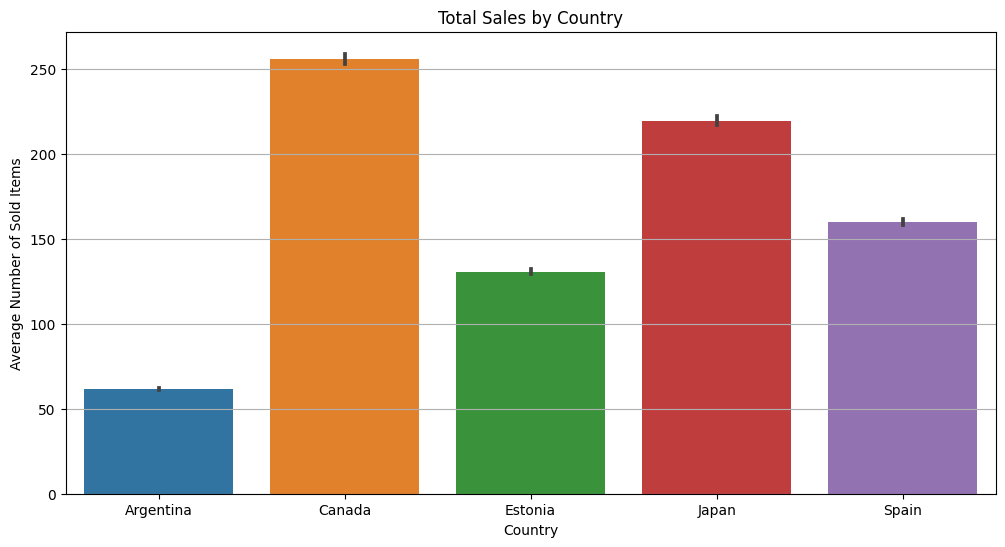

Average Sales by Country:
country
Argentina     61.454691
Canada       256.046513
Estonia      130.606754
Japan        219.561373
Spain        159.943848
Name: num_sold, dtype: float64


In [81]:
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='num_sold', data=train)
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Average Number of Sold Items')
plt.grid(axis='y')
plt.show()

# Print results
total_sales_by_country = train.groupby('country')['num_sold'].mean()

print("Average Sales by Country:")
print(total_sales_by_country)

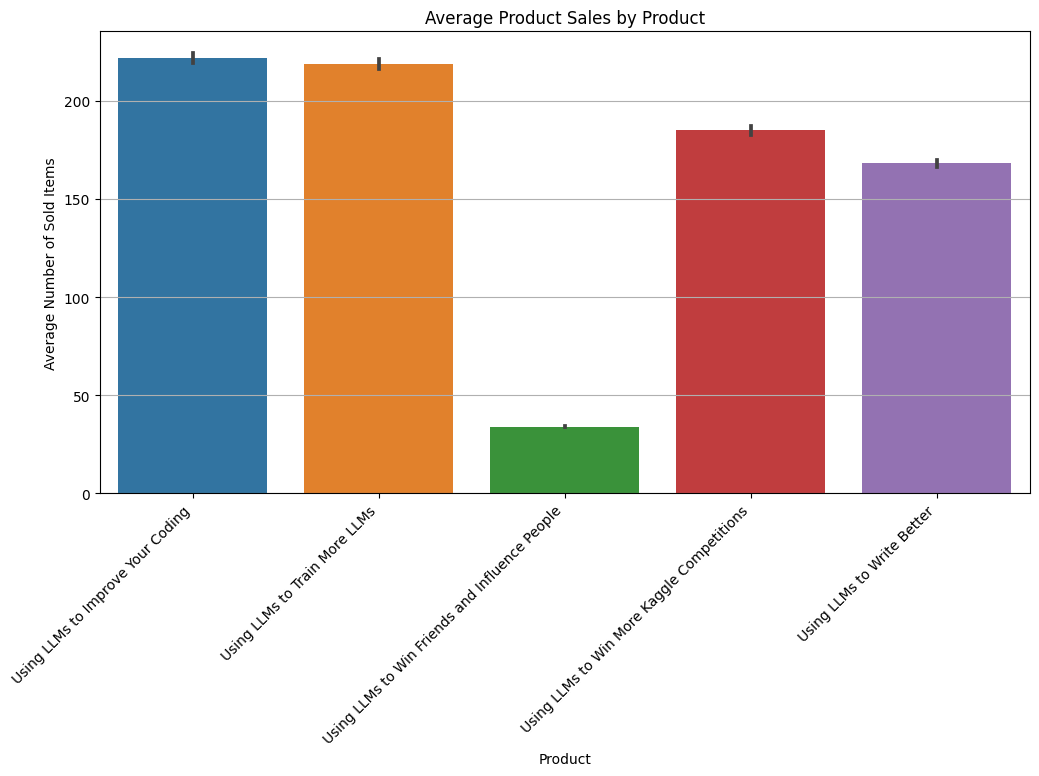

Average Product Sales by Product:
product
Using LLMs to Improve Your Coding                 221.587477
Using LLMs to Train More LLMs                     218.838080
Using LLMs to Win Friends and Influence People     34.047609
Using LLMs to Win More Kaggle Competitions        185.042461
Using LLMs to Write Better                        168.097554
Name: num_sold, dtype: float64


In [82]:
# Bar plot of average product sales by product
plt.figure(figsize=(12, 6))
sns.barplot(x='product', y='num_sold', data=train)
plt.title('Average Product Sales by Product')
plt.xlabel('Product')
plt.ylabel('Average Number of Sold Items')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Print results
average_sales_by_product = train.groupby('product')['num_sold'].mean()
print("Average Product Sales by Product:")
print(average_sales_by_product)

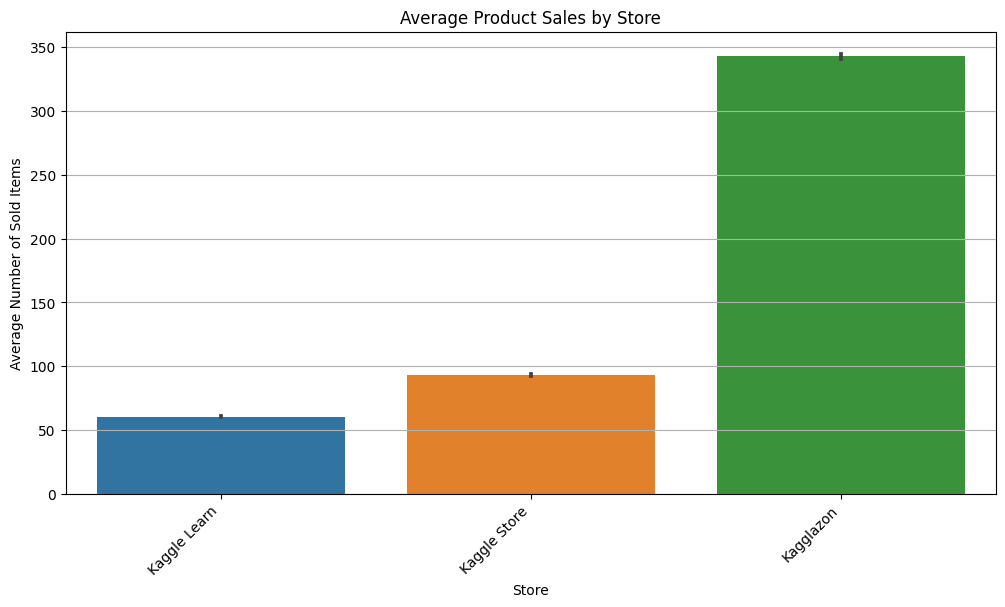

Average Product Sales by Store:
store
Kagglazon       343.074151
Kaggle Learn     60.370953
Kaggle Store     93.122804
Name: num_sold, dtype: float64


In [83]:
# Bar plot of average product sales by product
plt.figure(figsize=(12, 6))
sns.barplot(x='store', y='num_sold', data=train)
plt.title('Average Product Sales by Store')
plt.xlabel('Store')
plt.ylabel('Average Number of Sold Items')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Print results
average_sales_by_product = train.groupby('store')['num_sold'].mean()
print("Average Product Sales by Store:")
print(average_sales_by_product)

<Figure size 1200x600 with 0 Axes>

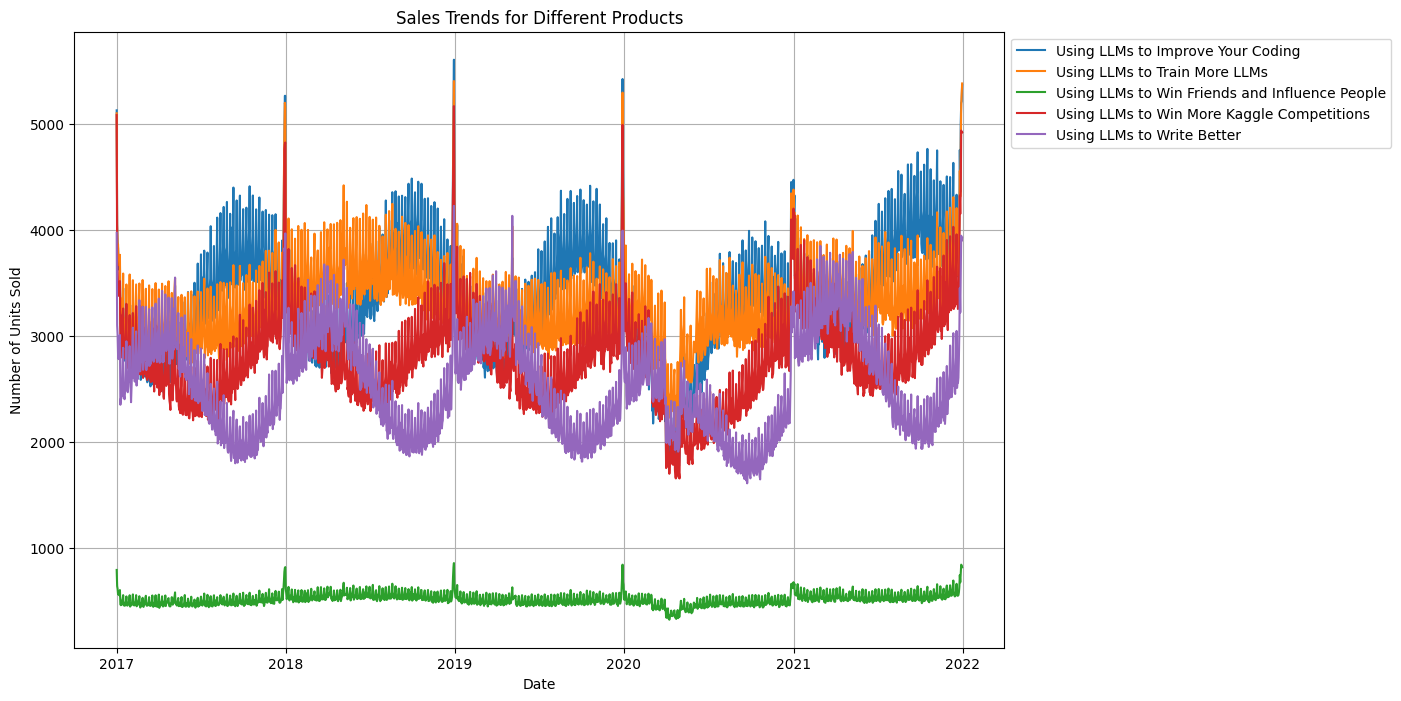

In [84]:
plt.figure(figsize=(12, 6))

train['date'] = pd.to_datetime(train['date'])

# Group by 'date' and 'product', then sum the 'num_sold' for each date and product
total_sales_per_product = train.groupby(['date', 'product'])['num_sold'].sum().unstack()

# Plotting
plt.figure(figsize=(12, 8))

# Iterate over each product and plot a line for each
for product in total_sales_per_product.columns:
    plt.plot(total_sales_per_product.index, total_sales_per_product[product], label=product)


plt.title('Sales Trends for Different Products')
plt.xlabel('Date')
plt.ylabel('Number of Units Sold')
plt.legend()
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

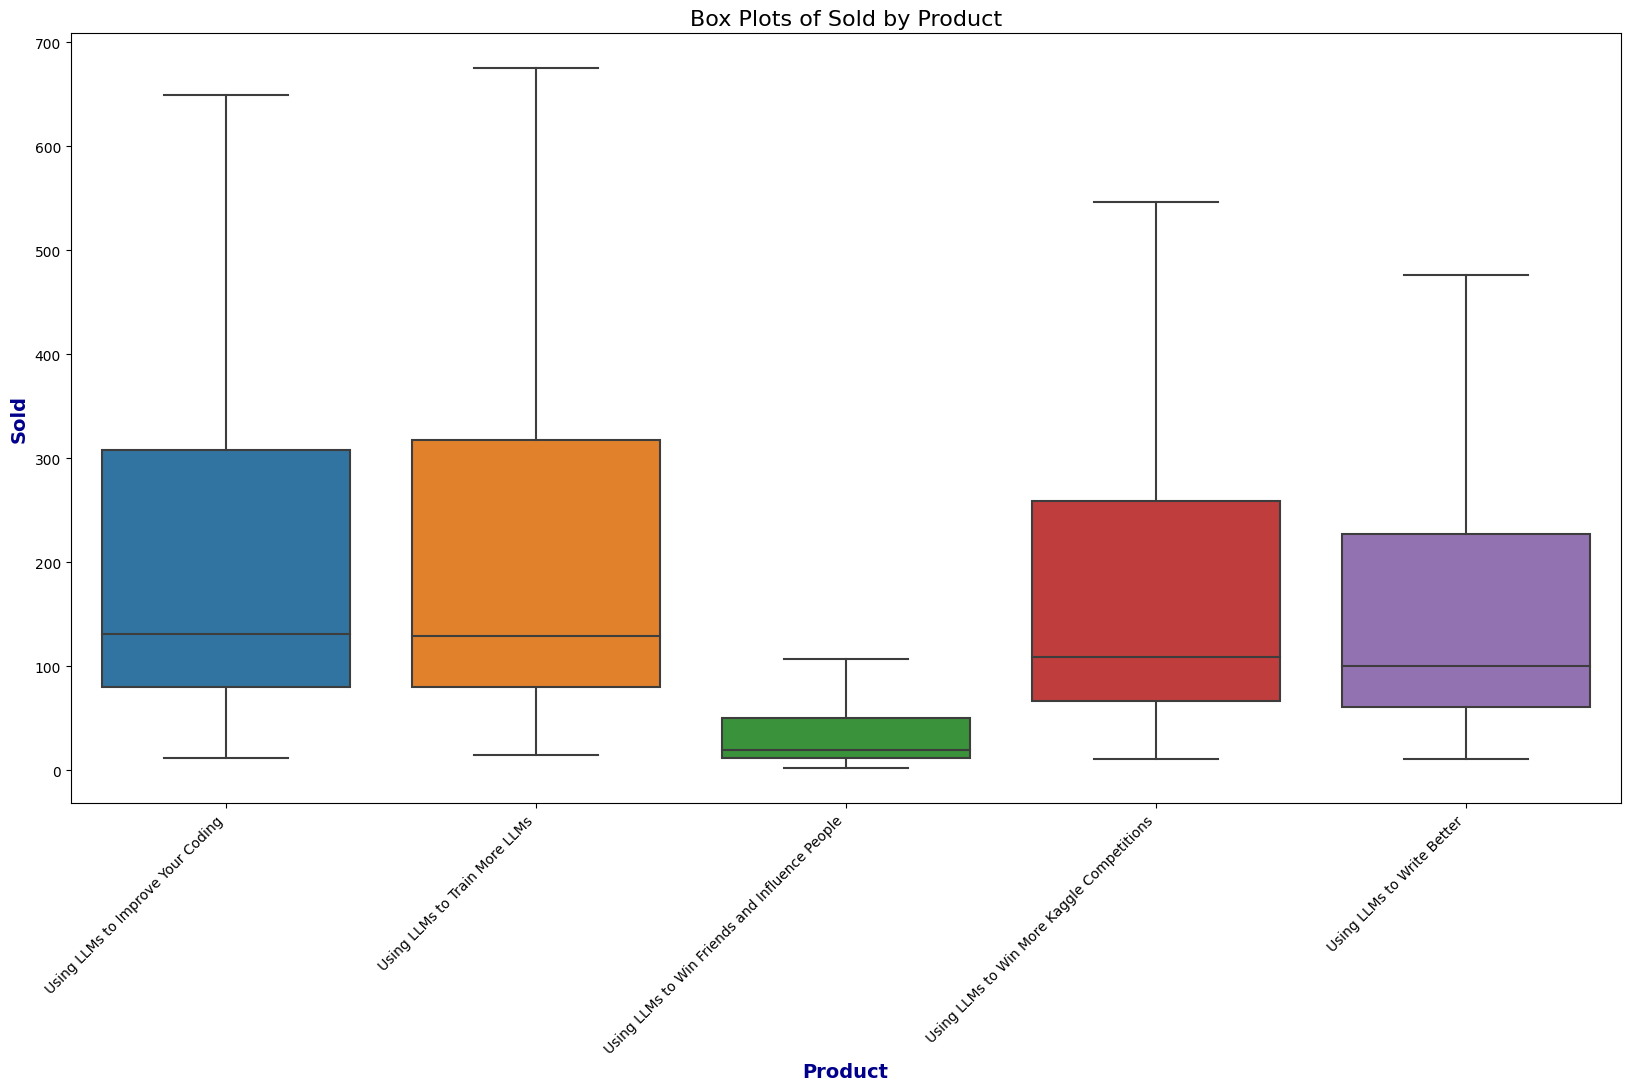

In [85]:
plt.figure(figsize=(20,10))
sns.boxplot(x=train['product'], y=train['num_sold'], showfliers = False)

plt.xticks(rotation=90)
plt.xlabel('Product', fontsize = 14, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Sold', fontsize = 14, fontweight = 'bold', color = 'darkblue')
plt.xticks(rotation=45, ha='right')

plt.title('Box Plots of Sold by Product', fontsize = 16)

plt.show()

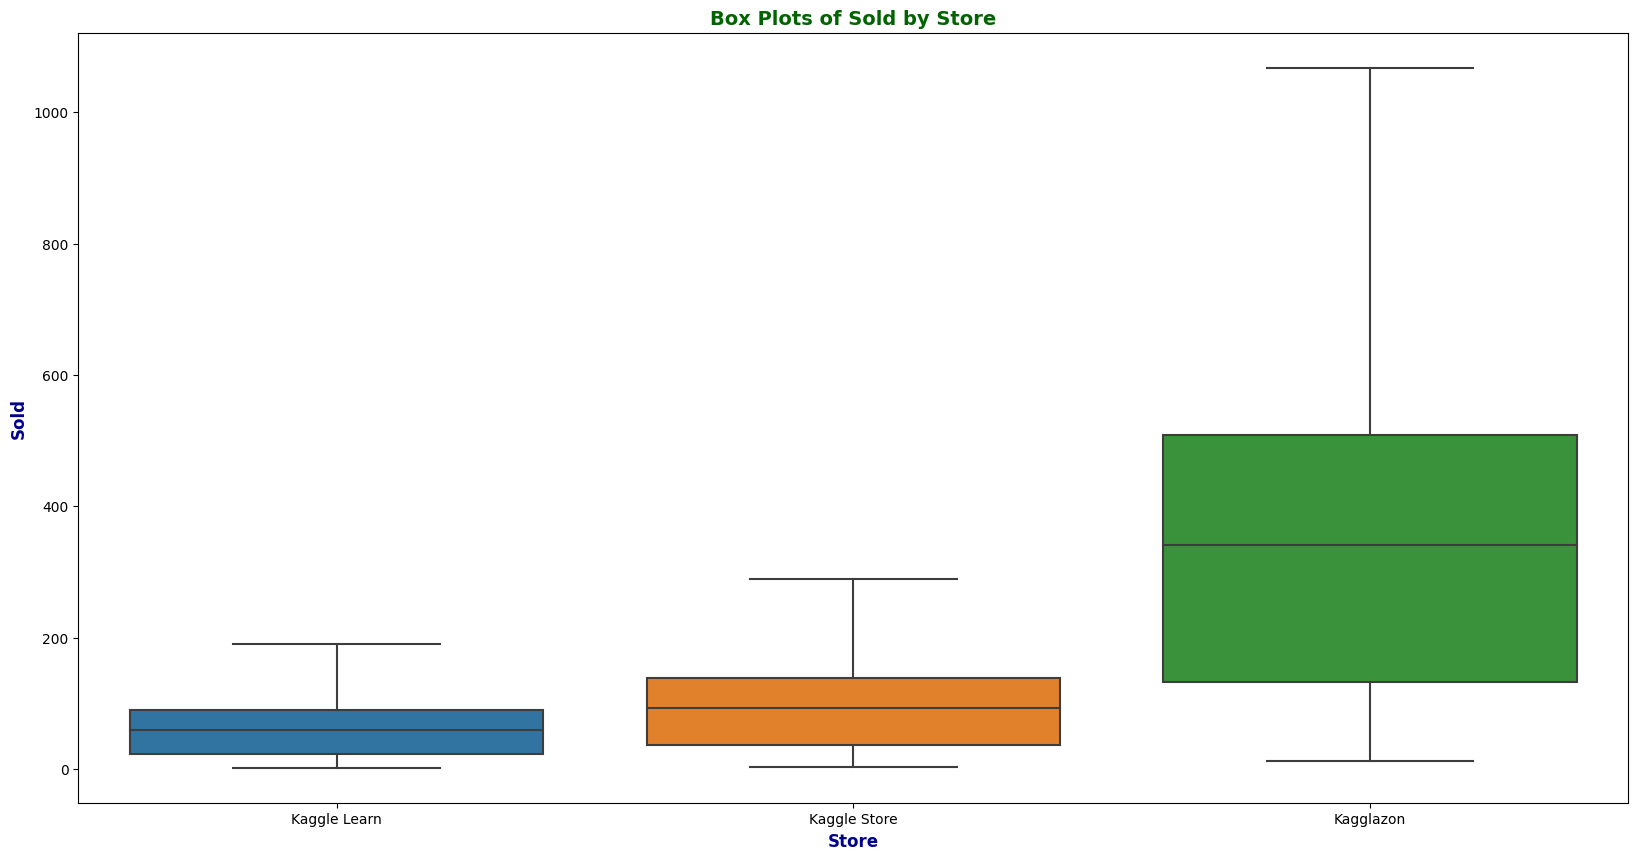

In [86]:
plt.figure(figsize=(20,10))
sns.boxplot(x=train['store'].astype(str), y=train['num_sold'], showfliers = False)

plt.xlabel('Store', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Sold', fontsize = 12, fontweight = 'bold', color = 'darkblue')

plt.title('Box Plots of Sold by Store', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.show()

In [87]:
#train_test = pd.concat([train,test])
train_test = train.copy()
train_test

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641


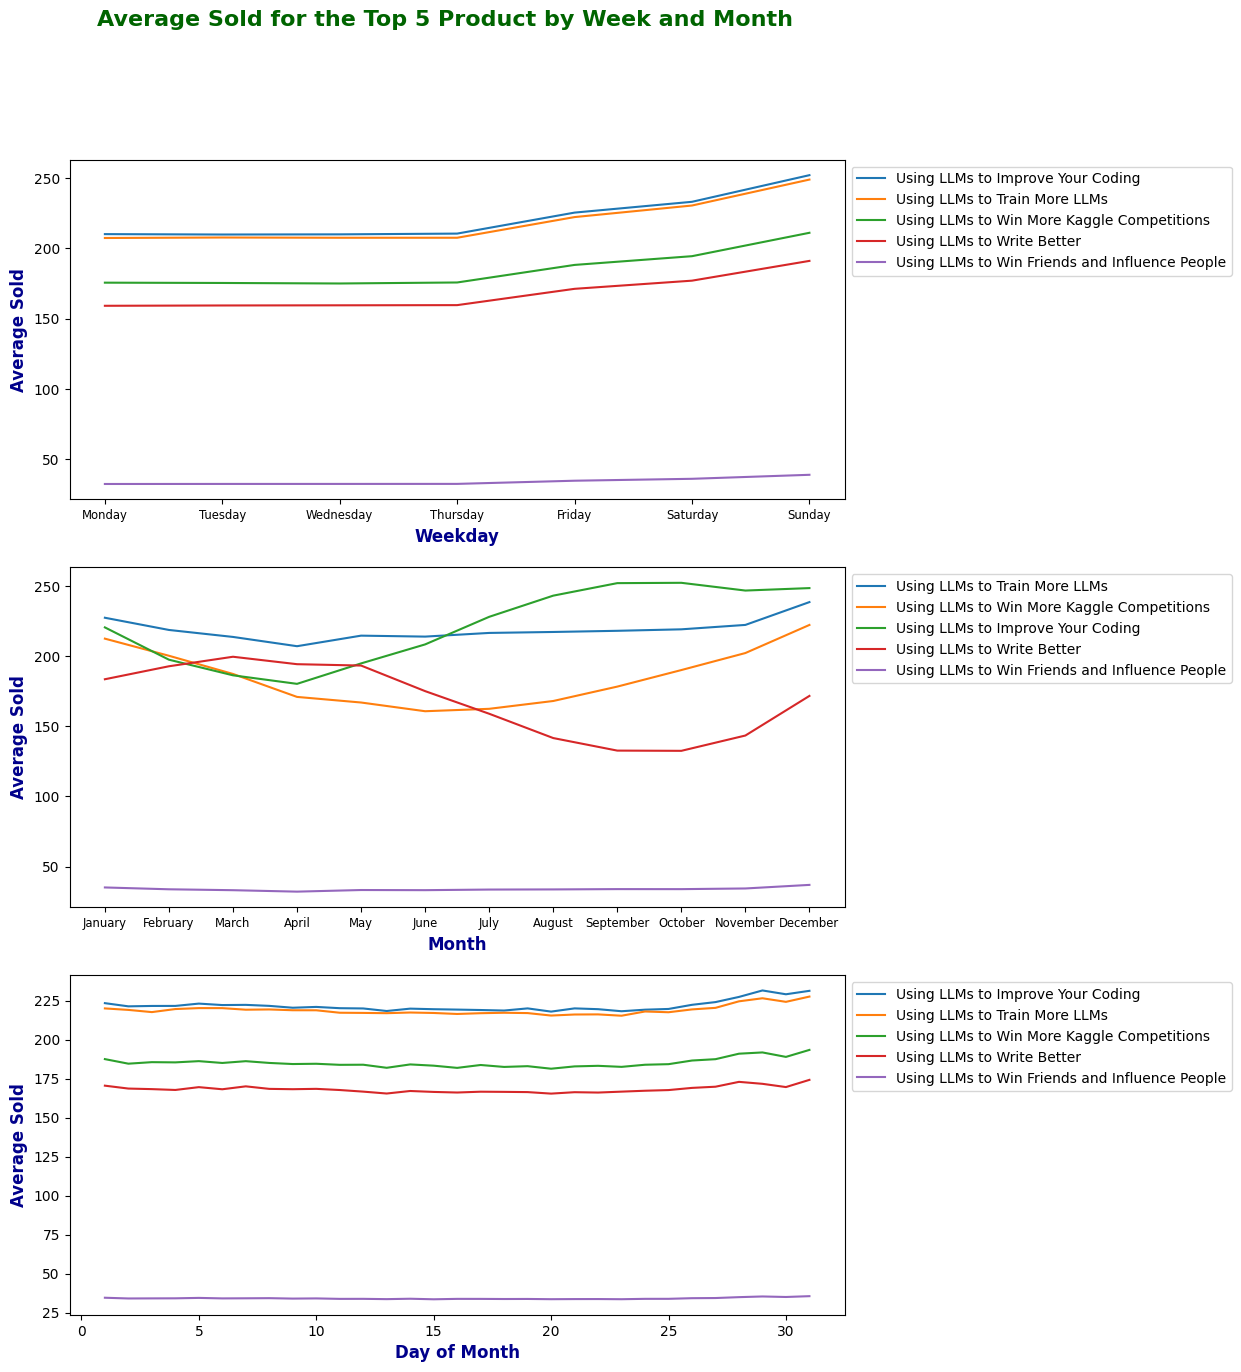

In [88]:
train_test['date'] = train_test['date'].astype('datetime64[ns]')
train_test['year'] = train_test['date'].dt.year
train_test['dayofyear'] = train_test['date'].dt.dayofyear
train_test['quarter'] = train_test['date'].dt.quarter
train_test['weekofyear'] = train_test['date'].dt.isocalendar().week
train_test['weekday'] = train_test['date'].dt.dayofweek
train_test['month'] = train_test['date'].dt.month
train_test['day'] = train_test['date'].dt.day

# Convert 'num_sold' to numeric
train_test['num_sold'] = pd.to_numeric(train_test['num_sold'], errors='coerce')

# Plot Average Sold for top 5 product by day of week and month
weekday_num_sold_by_product = pd.crosstab(index=train_test['product'], columns=train_test['weekday'], values=train_test['num_sold'], aggfunc='mean').sort_values(by=[0], ascending=False).iloc[0:5, :]
month_num_sold_by_product = pd.crosstab(index=train_test['product'], columns=train_test['month'] - 1, values=train_test['num_sold'], aggfunc='mean').sort_values(by=[1], ascending=False).iloc[0:5, :]
day_of_month_num_sold_by_product = pd.crosstab(index=train_test['product'], columns=train_test['day'], values=train_test['num_sold'], aggfunc='mean').sort_values(by=[1], ascending=False).iloc[0:5, :]

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 15))

# plot weeks
plt.subplot(3, 1, 1)
for w_f in weekday_num_sold_by_product.iterrows():
    plt.plot(w_f[1], label=w_f[0])

plt.xticks(range(len(weekdays)), weekdays, size='small')
plt.ylabel('Average Sold', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.xlabel('Weekday', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.legend(bbox_to_anchor=(1, 1))

# plot months
plt.subplot(3, 1, 2)
for m_f in month_num_sold_by_product.iloc[0:5, :].iterrows():
    plt.plot(m_f[1], label=m_f[0])

plt.xticks(range(len(months)), months, size='small')
plt.ylabel('Average Sold', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.xlabel('Month', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.legend(bbox_to_anchor=(1, 1))

# plot day of month
plt.subplot(3, 1, 3)
for m_f in day_of_month_num_sold_by_product.iterrows():
    plt.plot(m_f[1], label=m_f[0])

plt.ylabel('Average Sold', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.xlabel('Day of Month', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.legend(bbox_to_anchor=(1, 1))

plt.suptitle('Average Sold for the Top 5 Product by Week and Month', fontsize = 16, fontweight = 'bold', color = 'darkgreen')

plt.show()

<Figure size 1200x600 with 0 Axes>

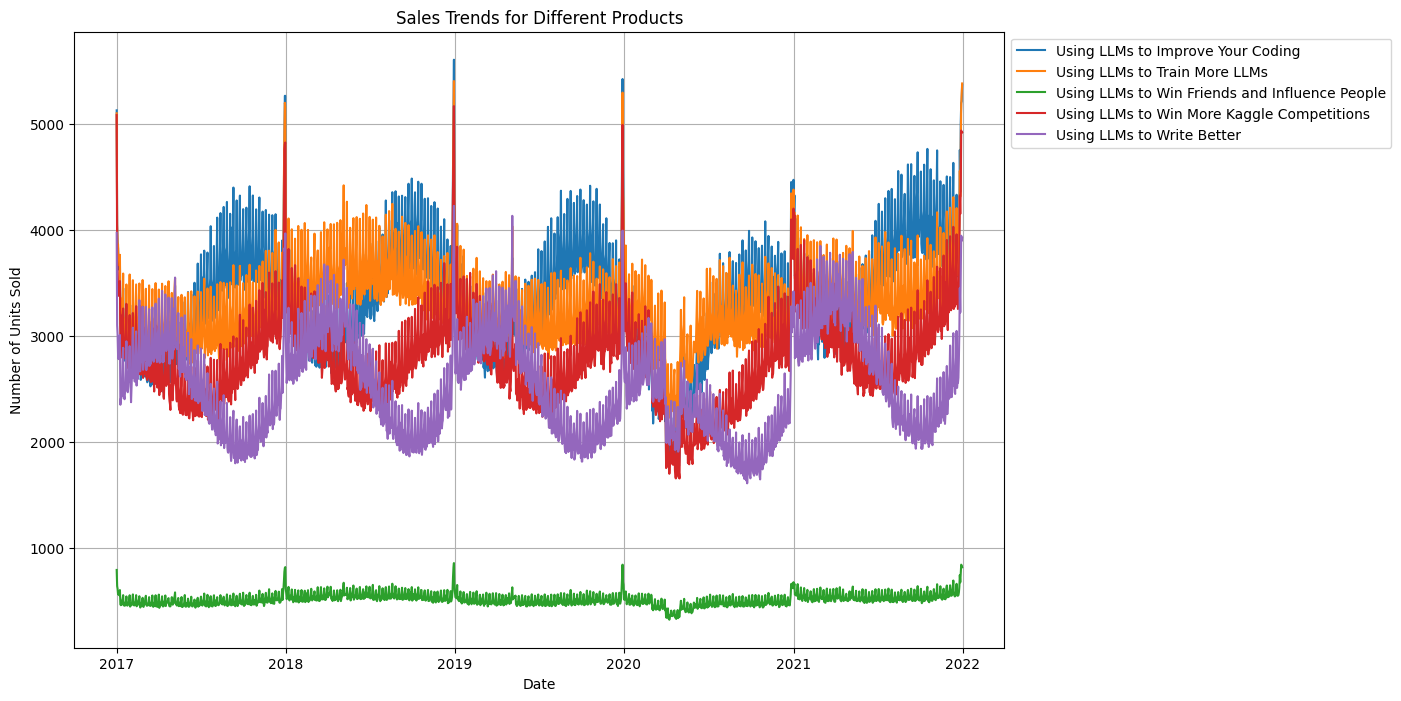

In [89]:
plt.figure(figsize=(12, 6))

train['date'] = pd.to_datetime(train['date'])

# Group by 'date' and 'product', then sum the 'num_sold' for each date and product
total_sales_per_product = train.groupby(['date', 'product'])['num_sold'].sum().unstack()

# Plotting
plt.figure(figsize=(12, 8))

# Iterate over each product and plot a line for each
for product in total_sales_per_product.columns:
    plt.plot(total_sales_per_product.index, total_sales_per_product[product], label=product)


plt.title('Sales Trends for Different Products')
plt.xlabel('Date')
plt.ylabel('Number of Units Sold')
plt.legend()
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [90]:
train_df = pd.DataFrame(train)

# Convert 'date' column to datetime type
train_df['date'] = pd.to_datetime(train_df['date'])


# Extract date features
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['dayofweek'] = train_df['date'].dt.dayofweek



train_df = train_df.drop(columns=['date'])


columns = ['country', 'store', 'product']
train_data = pd.get_dummies(train_df, columns=columns, prefix=columns)
train_data = train_data.replace({True: 1, False: 0})


X = train_data.drop(columns=['id', 'num_sold'])
y = train_data['num_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
X

,year,month,day,dayofweek,country_Argentina,country_Canada,country_Estonia,country_Japan,country_Spain,store_Kagglazon,store_Kaggle Learn,store_Kaggle Store,product_Using LLMs to Improve Your Coding,product_Using LLMs to Train More LLMs,product_Using LLMs to Win Friends and Influence People,product_Using LLMs to Win More Kaggle Competitions,product_Using LLMs to Write Better
0,2017,1,1,6,1,0,0,0,0,0,1,0,1,0,0,0,0
1,2017,1,1,6,1,0,0,0,0,0,1,0,0,1,0,0,0
2,2017,1,1,6,1,0,0,0,0,0,1,0,0,0,1,0,0
3,2017,1,1,6,1,0,0,0,0,0,1,0,0,0,0,1,0
4,2017,1,1,6,1,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136945,2021,12,31,4,0,0,0,0,1,1,0,0,1,0,0,0,0
136946,2021,12,31,4,0,0,0,0,1,1,0,0,0,1,0,0,0
136947,2021,12,31,4,0,0,0,0,1,1,0,0,0,0,1,0,0
136948,2021,12,31,4,0,0,0,0,1,1,0,0,0,0,0,1,0


In [92]:
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)

predictions_knn = model_knn.predict(X_test)

mse_knn = mean_squared_error(y_test, predictions_knn)
rmse_knn = sqrt(mse_knn)

print("KNeighborsRegressor Model")
print("MAE" , metrics.mean_absolute_error(y_test, predictions_knn))
print("MSE" , metrics.mean_squared_error(y_test, predictions_knn))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, predictions_knn)))
print("R2" , metrics.explained_variance_score(y_test, predictions_knn))


KNeighborsRegressor Model
MAE 56.835786783497625
MSE 7562.6376706827305
RMSE 86.96342720179979
R2 0.7759387813954113


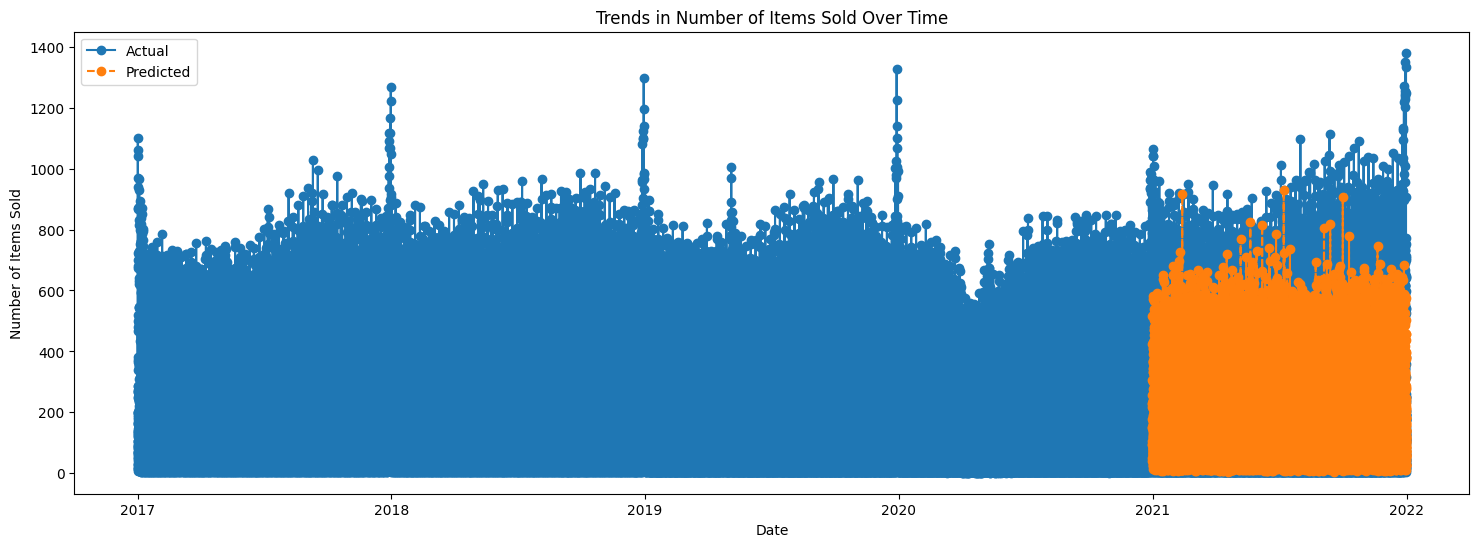

In [94]:
plt.figure(figsize=(18, 6))
plt.plot(train['date'], train['num_sold'], marker='o', label='Actual')
plt.plot(train['date'][len(X_train):], predictions_knn, marker='o', linestyle='dashed', label='Predicted')
plt.title('Trends in Number of Items Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Items Sold')
plt.legend()
plt.show()

In [95]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

predictions_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, predictions_rf)
rmse_rf = sqrt(mse_rf)
print("Random Forest Model")
print("MAE" , metrics.mean_absolute_error(y_test, predictions_rf))
print("MSE" , metrics.mean_squared_error(y_test, predictions_rf))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, predictions_rf)))
print("R2" , metrics.explained_variance_score(y_test, predictions_rf))




Random Forest Model
MAE 8.586995983935743
MSE 271.5224447827675
RMSE 16.47793812291961
R2 0.991955959722994


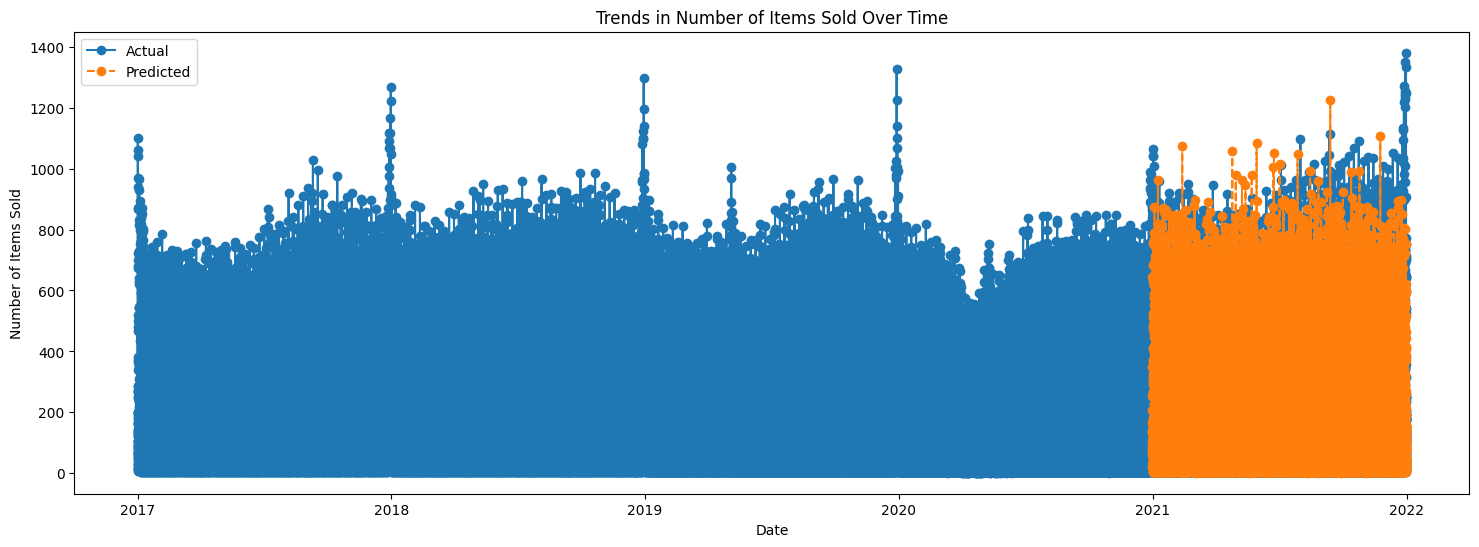

In [96]:
plt.figure(figsize=(18, 6))
plt.plot(train['date'], train['num_sold'], marker='o', label='Actual')
plt.plot(train['date'][len(X_train):], predictions_rf, marker='o', linestyle='dashed', label='Predicted')
plt.title('Trends in Number of Items Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Items Sold')
plt.legend()
plt.show()

In [97]:
X_test

,year,month,day,dayofweek,country_Argentina,country_Canada,country_Estonia,country_Japan,country_Spain,store_Kagglazon,store_Kaggle Learn,store_Kaggle Store,product_Using LLMs to Improve Your Coding,product_Using LLMs to Train More LLMs,product_Using LLMs to Win Friends and Influence People,product_Using LLMs to Win More Kaggle Competitions,product_Using LLMs to Write Better
135486,2021,12,12,6,0,0,1,0,0,0,0,1,0,1,0,0,0
112235,2021,2,5,4,0,0,1,0,0,0,0,1,1,0,0,0,0
73585,2019,9,9,0,1,0,0,0,0,1,0,0,1,0,0,0,0
132039,2021,10,27,2,0,0,1,0,0,0,0,1,0,0,0,0,1
7090,2017,4,5,2,0,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3807,2017,2,20,0,0,0,0,1,0,1,0,0,0,0,1,0,0
43333,2018,8,1,2,0,0,0,1,0,1,0,0,0,0,0,1,0
6783,2017,4,1,5,0,0,1,0,0,0,1,0,0,0,0,1,0
55899,2019,1,16,2,0,1,0,0,0,0,0,1,0,0,0,0,1


In [128]:
model_XGB = XGBRegressor()
model_XGB.fit(X_train, y_train)

predictions_XGB = model_XGB.predict(X_test)

mse_XGB = mean_squared_error(y_test, predictions_XGB)
rmse_XGB = sqrt(mse_XGB)
print("XGBoost Model")
print("MAE" , metrics.mean_absolute_error(y_test, predictions_XGB))
print("MSE" , metrics.mean_squared_error(y_test, predictions_XGB))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, predictions_XGB)))
print("R2" , metrics.explained_variance_score(y_test, predictions_XGB))

XGBoost Model
MAE 8.149234304930465
MSE 214.27154137717116
RMSE 14.63801698923632
R2 0.9936520219018324


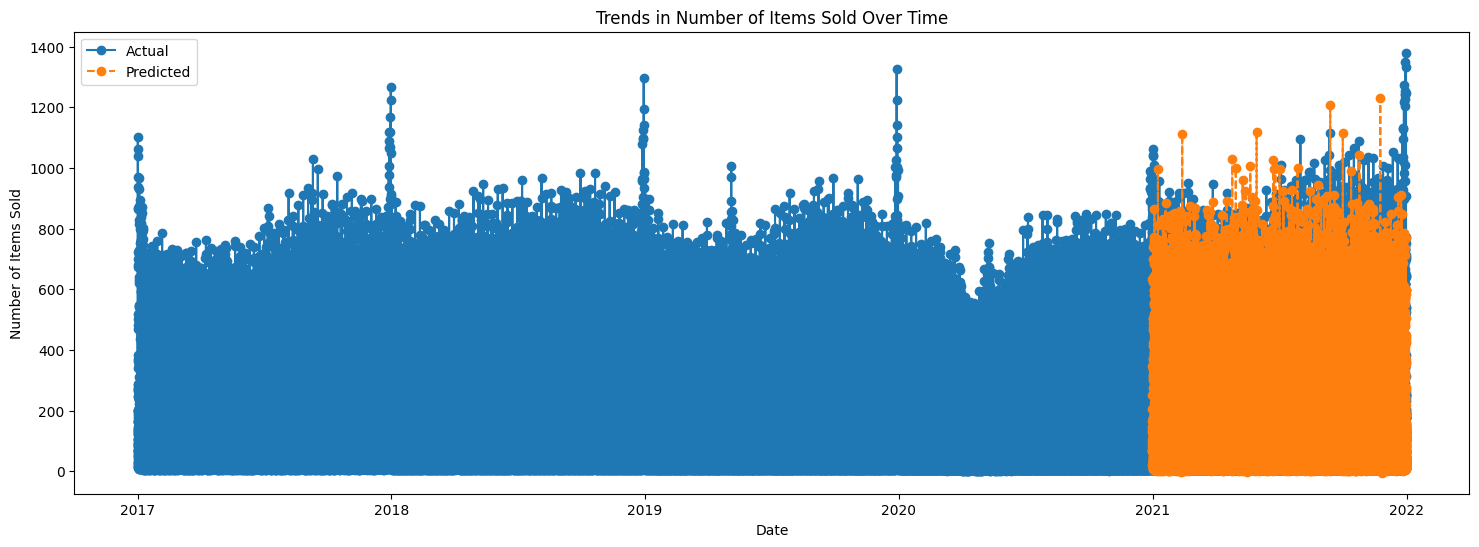

In [99]:
plt.figure(figsize=(18, 6))
plt.plot(train['date'], train['num_sold'], marker='o', label='Actual')
plt.plot(train['date'][len(X_train):], predictions_XGB, marker='o', linestyle='dashed', label='Predicted')
plt.title('Trends in Number of Items Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Items Sold')
plt.legend()
plt.show()

In [100]:
model_LGBM = LGBMRegressor()
model_LGBM.fit(X_train, y_train)


predictions_LGBM = model_LGBM.predict(X_test)

mse_LGBM = mean_squared_error(y_test, predictions_LGBM)
rmse_LGBM = sqrt(mse_LGBM)
print("Random Forest Model")
print("MAE" , metrics.mean_absolute_error(y_test, predictions_LGBM))
print("MSE" , metrics.mean_squared_error(y_test, predictions_LGBM))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, predictions_LGBM)))
print("R2" , metrics.explained_variance_score(y_test, predictions_LGBM))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 109560, number of used features: 17
[LightGBM] [Info] Start training from score 165.561072
Random Forest Model
MAE 9.3131230280189
MSE 273.46886370886693
RMSE 16.53689401637644
R2 0.9918979494208087


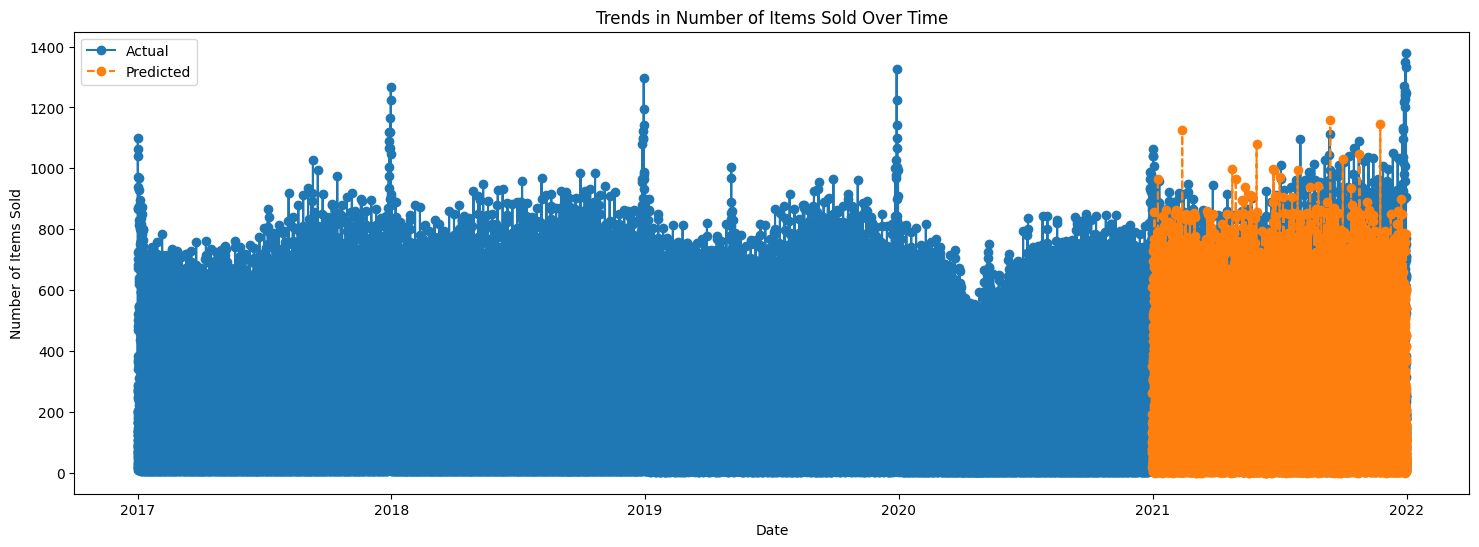

In [101]:
plt.figure(figsize=(18, 6))
plt.plot(train['date'], train['num_sold'], marker='o', label='Actual')
plt.plot(train['date'][len(X_train):], predictions_LGBM, marker='o', linestyle='dashed', label='Predicted')
plt.title('Trends in Number of Items Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Items Sold')
plt.legend()
plt.show()

In [102]:
X_train.shape

(109560, 17)

In [143]:
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam

In [112]:
epochs = 40
batch = 256
lr = 0.0003
adam = optimizers.Adam(lr)

model_mlp = Sequential()
model_mlp.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model_mlp.add(Dense(1))
model_mlp.compile(loss='mse', optimizer=adam)
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1800      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1901 (7.43 KB)
Trainable params: 1901 (7.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [113]:
mlp_history = model_mlp.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=2)

Epoch 1/40
3424/3424 - 4s - loss: 32543.6152 - val_loss: 30805.2266 - 4s/epoch - 1ms/step
Epoch 2/40
3424/3424 - 3s - loss: 28186.3926 - val_loss: 24891.7305 - 3s/epoch - 853us/step
Epoch 3/40
3424/3424 - 3s - loss: 20889.6211 - val_loss: 16754.1777 - 3s/epoch - 860us/step
Epoch 4/40
3424/3424 - 3s - loss: 13382.0029 - val_loss: 10572.9482 - 3s/epoch - 867us/step
Epoch 5/40
3424/3424 - 3s - loss: 9045.6387 - val_loss: 7950.8267 - 3s/epoch - 871us/step
Epoch 6/40
3424/3424 - 3s - loss: 7589.8218 - val_loss: 7401.9341 - 3s/epoch - 842us/step
Epoch 7/40
3424/3424 - 3s - loss: 7133.6587 - val_loss: 6899.4238 - 3s/epoch - 864us/step
Epoch 8/40
3424/3424 - 3s - loss: 6759.6543 - val_loss: 6490.5503 - 3s/epoch - 888us/step
Epoch 9/40
3424/3424 - 3s - loss: 6362.4229 - val_loss: 6169.5718 - 3s/epoch - 908us/step
Epoch 10/40
3424/3424 - 3s - loss: 5975.6240 - val_loss: 5675.0942 - 3s/epoch - 908us/step
Epoch 11/40
3424/3424 - 3s - loss: 5554.6948 - val_loss: 5345.5254 - 3s/epoch - 885us/step
Ep

In [114]:
predictions_MLP = model_mlp.predict(X_test)

mse_MLP = mean_squared_error(y_test, predictions_MLP)
rmse_MLP = sqrt(mse_MLP)
print("MLP Model")
print("MAE" , metrics.mean_absolute_error(y_test, predictions_MLP))
print("MSE" , metrics.mean_squared_error(y_test, predictions_MLP))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, predictions_MLP)))
print("R2" , metrics.explained_variance_score(y_test, predictions_MLP))

856/856 [==============================] - 1s 632us/step
Random Forest Model
MAE 26.258414913210512
MSE 1814.803806226989
RMSE 42.60051415449101
R2 0.9480143351736198


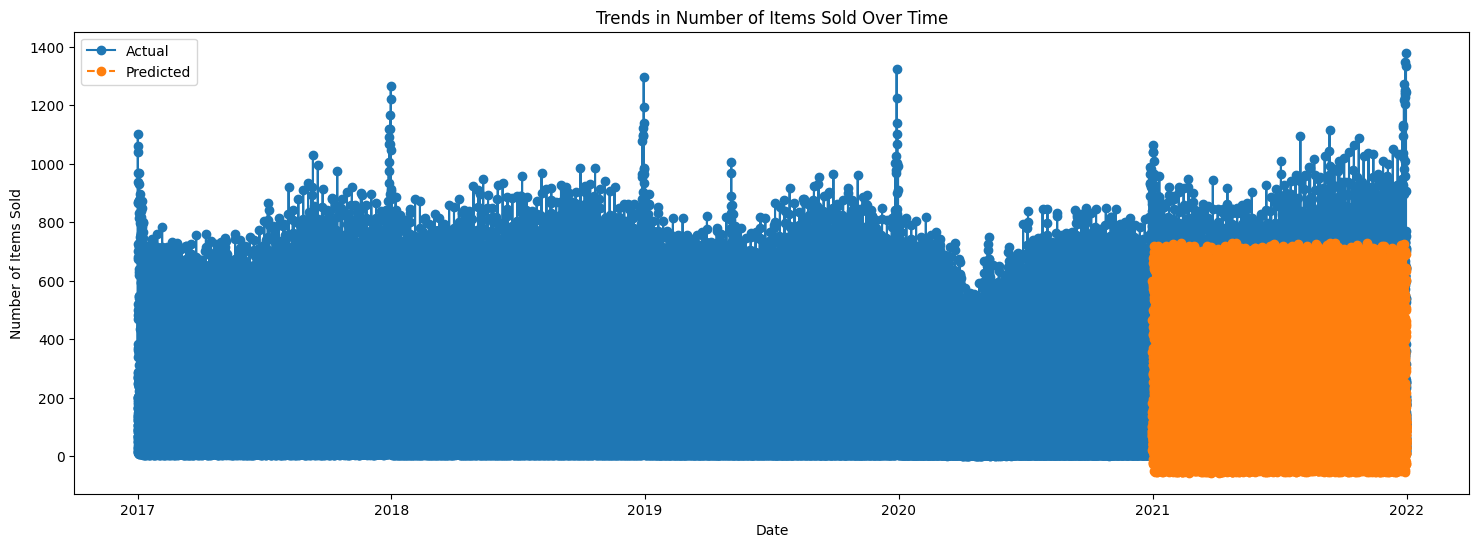

In [115]:
plt.figure(figsize=(18, 6))
plt.plot(train['date'], train['num_sold'], marker='o', label='Actual')
plt.plot(train['date'][len(X_train):], predictions_MLP, marker='o', linestyle='dashed', label='Predicted')
plt.title('Trends in Number of Items Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Items Sold')
plt.legend()
plt.show()

In [136]:
y_train

44455     649
56942      19
94895     151
63127      23
2212       12
         ... 
110268    167
119879    704
103694    201
131932      6
121958     29
Name: num_sold, Length: 109560, dtype: int64

In [138]:
X_train.shape

(109560, 17)

In [139]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_series = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_test_series.shape)

Train set shape (109560, 17, 1)
Validation set shape (27390, 17, 1)


In [157]:
model_lstm = Sequential()
model_lstm.add(LSTM(50,return_sequences = True , activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_lstm.add(LSTM(50 , return_sequences = True))

model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 17, 50)            10400     
                                                                 
 lstm_17 (LSTM)              (None, 17, 50)            20200     
                                                                 
 dense_10 (Dense)            (None, 17, 1)             51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


lstm_history = model_lstm.fit(X_train_series, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=2)

In [130]:
print(f"Knn Forest Model RMSE: {rmse_knn}")
print(f"Random Forest Model RMSE: {rmse_rf}")
print(f"XGB Model RMSE: {rmse_XGB}")
print(f"LGBM Model RMSE: {rmse_LGBM}")
print(f"MLP Model RMSE: {rmse_MLP}")


Knn Forest Model RMSE: 86.96342720179979
Random Forest Model RMSE: 16.47793812291961
XGB Model RMSE: 14.63801698923632
LGBM Model RMSE: 16.53689401637644
MLP Model RMSE: 42.60051415449101


In [104]:
test

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better
...,...,...,...,...,...
27370,164320,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding
27371,164321,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs
27372,164322,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People
27373,164323,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions


In [119]:
test_df = pd.DataFrame(test)

test_df['date'] = pd.to_datetime(test_df['date'])


test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
test_df['dayofweek'] = test_df['date'].dt.dayofweek

test_df = test_df.drop(columns=['date'])

columns = ['country', 'store', 'product']
test_data = pd.get_dummies(test_df, columns=columns, prefix=columns)
test_data = test_data.replace({True: 1, False: 0})
test_data = test_data.drop(columns=['id'])



In [120]:
test_data

,year,month,day,dayofweek,country_Argentina,country_Canada,country_Estonia,country_Japan,country_Spain,store_Kagglazon,store_Kaggle Learn,store_Kaggle Store,product_Using LLMs to Improve Your Coding,product_Using LLMs to Train More LLMs,product_Using LLMs to Win Friends and Influence People,product_Using LLMs to Win More Kaggle Competitions,product_Using LLMs to Write Better
0,2022,1,1,5,1,0,0,0,0,0,1,0,1,0,0,0,0
1,2022,1,1,5,1,0,0,0,0,0,1,0,0,1,0,0,0
2,2022,1,1,5,1,0,0,0,0,0,1,0,0,0,1,0,0
3,2022,1,1,5,1,0,0,0,0,0,1,0,0,0,0,1,0
4,2022,1,1,5,1,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27370,2022,12,31,5,0,0,0,0,1,1,0,0,1,0,0,0,0
27371,2022,12,31,5,0,0,0,0,1,1,0,0,0,1,0,0,0
27372,2022,12,31,5,0,0,0,0,1,1,0,0,0,0,1,0,0
27373,2022,12,31,5,0,0,0,0,1,1,0,0,0,0,0,1,0


In [121]:
testpredict = model_mlp.predict(test_data)

856/856 [==============================] - 1s 622us/step


In [124]:
testpredict = testpredict.flatten()
testpredict

array([ 33.062126,  32.185875, -47.68817 , ...,  71.25849 , 408.53506 ,
       364.35083 ], dtype=float32)

In [125]:
# Create a submission DataFrame with 'id' in the range of 136950-164324
submission_df = pd.DataFrame({'id': test_df['id'], 'num_sold': testpredict})
# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

# Display the submission DataFrame
print(submission_df)

           id    num_sold
0      136950   33.062126
1      136951   32.185875
2      136952  -47.688171
3      136953   23.678354
4      136954   17.890924
...       ...         ...
27370  164320  488.787140
27371  164321  483.709930
27372  164322   71.258492
27373  164323  408.535065
27374  164324  364.350830

[27375 rows x 2 columns]


In [109]:
#predictions_XGB
abc = y_test.copy()
abc['predict'] = predictions_XGB
abc

135486                                                   129
112235                                                   110
73585                                                    154
132039                                                    63
7090                                                     249
                                 ...                        
43333                                                    409
6783                                                      46
55899                                                    144
25512                                                     35
predict    [144.89613, 103.38967, 165.33072, 65.80959, 25...
Name: num_sold, Length: 27391, dtype: object